# Chapter 2: Overview of the Data Mining Process

## Import required packages
We use the pandas, the Python data anlysis library, for handling data. The API of this library is very similar to R data frames. See https://pandas.pydata.org/ for details.

Make sure DMBA package is available

In [1]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import dmba

import matplotlib.pylab as plt

Note that we import some of the packages using an alias notation, to make the code more readable.
```
import <package> as <alias>
```
The aliases `np`, `pd`, and `plt` are commonly used in the data science community.

The following statement defines the location of the data files in your file system. Here we assume that the data folder is located in the parent folder of this ipython notebook.

## Table 2.3 
Load the West Roxbury data set

In [4]:
housing_df = dmba.load_data('WestRoxbury.csv')

Determine the shape of the data frame. It has 5802 rows and 14 columns

In [5]:
housing_df.shape

(5802, 14)

Show the top rows of the dataframe

In [7]:
housing_df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN


In [8]:
housing_df.head(50)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN
5,337.4,4244,5142,1950,2124,1060,1.0,6,3,1,0,1,1,Old
6,359.4,4521,5000,1954,3220,1916,2.0,7,3,1,1,1,0,NaN
7,320.4,4030,10000,1950,2208,1200,1.0,6,3,1,0,1,0,NaN
8,333.5,4195,6835,1958,2582,1092,1.0,5,3,1,0,1,1,Recent
9,409.4,5150,5093,1900,4818,2992,2.0,8,4,2,0,1,0,NaN


## Cleanup
Preprocessing and cleaning up data is an important aspect of data analysis. 

Show the column names.

In [9]:
housing_df.columns

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

Note that some column titles end with spaces and some consist of two space separated words. For further analysis it's more convenient to have column names which are single words. 

In the rename command you can specify individual columns by name and provide their new name using a dictionary. Note that we use the `inplace` argument here. This means that the data frame is modified directly. By default, the modification is done on a copy and the copy returned by the method.

In [10]:
housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'})
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

We therefore strip trailing spaces and replace the remaining spaces with an underscore _. Instead of using the `rename` method, we create a modified copy of `columns` and assign to the `columns` field of the dataframe.

In [11]:
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

## Accessing subsets of the data
Pandas uses two methods to access rows in a data frame; `loc` and `iloc`. The `loc` method is more general and allows accessing rows using labels. The `iloc` method on the other hand only allows using integer numbers. To specify a range of rows use the slice notation, e.g. `0:9`.

<div class='alert alert-info'>Note that in contrast to R, Python uses 0-indexing, which means that indices start at 0 and not at 1.</div>

To show the first four rows of the data frame, you can use the following commands.

In [12]:
housing_df.loc[0:3]  # for loc, the second index in the slice is inclusive

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN


In [13]:
housing_df.iloc[0:4]  # for loc, the second index in the slice is exclusive

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN


Note the difference in the two methods with respect to the slice notation! For consistency with how slices are defined in Python, we will use the `iloc` method mostly from here on.

Next, show the first ten rows of the first column

In [14]:
housing_df['TOTAL_VALUE'].iloc[0:10]
housing_df.iloc[0:10]['TOTAL_VALUE']  # the order is not important
housing_df.iloc[0:10].TOTAL_VALUE

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

Show the fifth row of the first 10 columns. The `iloc` methods allows specifying the rows and columns within one set of brackets. `dataframe.iloc[rows, columns]`

In [15]:
housing_df.iloc[4][0:10]
housing_df.iloc[4, 0:10]  # this is equivalent

TOTAL_VALUE    331.5
TAX             4170
LOT_SQFT        5000
YR_BUILT        1910
GROSS_AREA      2370
LIVING_AREA     1438
FLOORS           2.0
ROOMS              7
BEDROOMS           3
FULL_BATH          2
Name: 4, dtype: object

If you prefer to preserve the data frame format, use a slice for the rows as well.

In [16]:
housing_df.iloc[4:5, 0:10]

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2


Use the `pd.concat` method if you want to combine non-consecutive columns into a new data frame. The `axis` argument specifies the dimension along which the concatenation happens, 0=rows, 1=columns.

In [17]:
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[4:6,4:6]], axis=1)

,TOTAL_VALUE,TAX,GROSS_AREA,LIVING_AREA
4,331.5,4170,2370,1438
5,337.4,4244,2124,1060


To specify a full column, use the `:` on its own.
```
housing_df.iloc[:,0:1]
```
A often more practical way is to use the column name as follows

In [18]:
housing_df['TOTAL_VALUE']

0       344.2
1       412.6
2       330.1
3       498.6
4       331.5
        ...  
5797    404.8
5798    407.9
5799    406.5
5800    308.7
5801    447.6
Name: TOTAL_VALUE, Length: 5802, dtype: float64

We can subset the column using a slice

In [19]:
housing_df['TOTAL_VALUE'][0:10]

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

Pandas provides a number of ways to access statistics of the columns.

In [20]:
print('Number of rows ', len(housing_df['TOTAL_VALUE']))
print('Mean of TOTAL_VALUE ', housing_df['TOTAL_VALUE'].mean())

Number of rows  5802
Mean of TOTAL_VALUE  392.6857149258877


A data frame also has the method `describe` that prints a number of common statistics 

In [21]:
housing_df['TOTAL_VALUE'].describe()

count    5802.000000
mean      392.685715
std        99.177414
min       105.000000
25%       325.125000
50%       375.900000
75%       438.775000
max      1217.800000
Name: TOTAL_VALUE, dtype: float64

In [22]:
housing_df.describe()

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


## Table 2.4
Use the `sample` method to retrieve a random sample of observations. Here we sample 5 observations without replacement.

In [24]:
housing_df.sample(5)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
3990,441.0,5547,8520,1929,3388,1781,1.5,7,3,1,1,1,1,NaN
5377,484.4,6093,6185,1930,2863,1820,2.0,6,3,1,1,1,0,NaN
5448,407.6,5127,6031,1948,4290,1856,1.0,7,2,1,1,1,1,Old
4665,351.1,4416,4640,1956,2208,1378,2.0,7,3,1,0,1,1,NaN
1060,388.4,4886,5000,1896,3360,1858,2.0,9,3,1,1,1,0,NaN


The sample method allows to specify weights for the individual rows. We use this here to oversample houses with over 10 rooms.

In [25]:
weights = [0.9 if rooms > 10 else 0.01 for rooms in housing_df.ROOMS]
housing_df.sample(5, weights=weights)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
5625,401.4,5049,6000,1954,2934,1377,1.0,6,3,2,1,1,1,Recent
603,283.0,3560,3108,1960,2616,1109,1.0,6,3,2,0,1,1,Recent
5675,478.6,6020,6500,1957,3748,2280,2.0,12,5,2,1,1,1,Recent
4051,626.3,7878,12169,1913,5751,2942,2.0,12,6,1,2,1,1,Old
3678,335.5,4220,5000,1940,2112,1300,2.0,6,3,1,0,1,0,NaN


In [36]:
import pandas as pd

# Drop rows with NaN values in 'REMODEL'
housing_df = housing_df.dropna(subset=['REMODEL'])

# Create a stratified sample
sample_size = 0.3  # 30% of the dataset
stratified_sample = housing_df.groupby('REMODEL', group_keys=False).apply(
    lambda x: x.sample(frac=sample_size, random_state=42)
)

C:\Users\lzl278\AppData\Local\Temp\ipykernel_2648\837729668.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample = housing_df.groupby('REMODEL', group_keys=False).apply(
C:\Users\lzl278\AppData\Local\Temp\ipykernel_2648\837729668.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = housing_df.groupby('REMODEL', group_keys=False).apply(


In [41]:
stratified_sample
# pd.set_option('display.max_rows', 100)  # Set to desired number of rows
# pd.set_option('display.max_columns', None)  # Show all columns

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL,ROOM_GROUP
5752,416.8,5243,5000,1930,2704,1613,2.0,7,3,1,0,1,1,Old,<=10
2633,315.0,3962,8502,1950,1912,876,1.0,5,3,1,0,1,1,Old,<=10
1278,320.5,4031,3600,1925,2437,1536,2.0,6,3,1,1,1,0,Old,<=10
4090,463.3,5828,8890,1930,2737,1696,2.0,9,3,2,0,1,1,Old,<=10
3978,414.3,5211,5523,1919,3568,1980,2.0,8,5,1,1,1,1,Old,<=10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5744,458.3,5765,6000,1934,4024,2062,1.5,8,3,2,0,1,1,Recent,<=10
5467,492.9,6200,5000,1925,3462,1808,2.0,8,3,1,0,1,1,Recent,<=10
5237,374.8,4714,5000,1925,2776,1536,2.0,7,3,1,1,1,1,Recent,<=10
891,431.1,5423,4945,1914,3898,2302,2.0,7,3,2,1,1,0,Recent,<=10


In [42]:
# Create a new column to define strata
housing_df['ROOM_GROUP'] = ['>10' if rooms > 10 else '<=10' for rooms in housing_df['ROOMS']]

# Perform stratified sampling
stratified_sample2 = housing_df.groupby('ROOM_GROUP', group_keys=False).apply(
    lambda x: x.sample(frac=0.5, random_state=42)  # 50% from each group
)

C:\Users\lzl278\AppData\Local\Temp\ipykernel_2648\3232134130.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample2 = housing_df.groupby('ROOM_GROUP', group_keys=False).apply(


In [40]:
stratified_sample2

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL,ROOM_GROUP
2808,661.8,8325,11200,1920,4562,2808,2.0,9,5,4,0,1,0,Recent,<=10
2665,460.0,5786,9379,1963,2320,1470,2.0,8,3,2,1,1,1,Recent,<=10
653,311.9,3923,5352,1970,2098,1320,2.0,7,3,1,1,1,1,Recent,<=10
2139,408.2,5135,5930,1880,3412,1850,2.0,9,4,1,1,1,1,Old,<=10
1262,317.5,3994,5200,1950,2234,864,1.0,5,3,1,0,1,1,Recent,<=10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,406.8,5117,5000,1936,3148,2088,2.0,11,3,1,0,1,1,Old,>10
2838,567.9,7144,12080,1899,3939,2265,2.0,12,5,2,1,1,1,Recent,>10
2453,564.7,7103,7676,1907,3596,2360,2.0,11,5,2,1,1,1,Recent,>10
2994,721.6,9077,5505,1900,5806,3626,2.0,14,7,3,1,1,2,Recent,>10


## Table 2.5

In [43]:
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL', 'ROOM_GROUP'],
      dtype='object')

The REMODEL column is a factor, so we need to change it's type.

In [44]:
print(housing_df.REMODEL.dtype)
housing_df.REMODEL = housing_df.REMODEL.astype('category')
print(housing_df.REMODEL.cat.categories)  # It can take one of three levels
print(housing_df.REMODEL.dtype)  # Type is now 'category'

category
Index(['Old', 'Recent'], dtype='object')
category


Other columns also have types.

In [45]:
print(housing_df.BEDROOMS.dtype)  # BEDROOMS is an integer variable
print(housing_df.TOTAL_VALUE.dtype)  # Total_Value is a numeric variable

int64
float64


It's also possible to the all columns data types 

In [46]:
housing_df.dtypes

TOTAL_VALUE     float64
TAX               int64
LOT_SQFT          int64
YR_BUILT          int64
GROSS_AREA        int64
LIVING_AREA       int64
FLOORS          float64
ROOMS             int64
BEDROOMS          int64
FULL_BATH         int64
HALF_BATH         int64
KITCHEN           int64
FIREPLACE         int64
REMODEL        category
ROOM_GROUP       object
dtype: object

## Table 2.6
Pandas provides a method to convert factors into dummy variables. In older versions of pandas, the missing values were treated as a separate category. In the book code, we therefore removed the first dummy variable. With newer versions of pandas, we can now call `get_dummies` with the default value of `drop_first=False`. 

In [50]:
# the missing values will create a third category
# use the arguments drop_first and dummy_na to control the outcome
housing_df = pd.get_dummies(housing_df, prefix_sep='_', dtype=int)
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_Old', 'REMODEL_Recent',
       'ROOM_GROUP_<=10', 'ROOM_GROUP_>10'],
      dtype='object')

In [49]:
print(housing_df.loc[:, 'REMODEL_Old':'REMODEL_Recent'].head(5))

    REMODEL_Old  REMODEL_Recent
1             0               1
5             1               0
8             0               1
16            1               0
21            0               1


## Table 2.7
To illustrate missing data procedures, we first convert a few entries for bedrooms to NA's. Then we impute these missing values using the median of the remaining values.

In [52]:
print('Number of rows with valid BEDROOMS values before: ', 
      housing_df['BEDROOMS'].count()) 
missingRows = housing_df.sample(10).index
housing_df.loc[missingRows, 'BEDROOMS'] = np.nan
print('Number of rows with valid BEDROOMS values after setting to NAN: ', 
      housing_df['BEDROOMS'].count()) 
housing_df['BEDROOMS'].count()

Number of rows with valid BEDROOMS values before:  1446
Number of rows with valid BEDROOMS values after setting to NAN:  1436


np.int64(1436)

In [53]:
# remove rows with missing values 
reduced_df = housing_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  1436


Replace the missing values using the median of the remaining values.

By default, the `median` method of a pandas dataframe ignores NA values. This is in contrast to R where this must be specified explicitly.

In [54]:
medianBedrooms = housing_df['BEDROOMS'].median()
housing_df.BEDROOMS = housing_df.BEDROOMS.fillna(value=medianBedrooms)
print('Number of rows with valid BEDROOMS values after filling NA values: ',
      housing_df['BEDROOMS'].count())

Number of rows with valid BEDROOMS values after filling NA values:  1456


## Table - scaling data

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = housing_df.copy()

# Normalizing a data frame

# pandas:
norm_df = (housing_df - housing_df.mean()) / housing_df.std()

# scikit-learn: 
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(housing_df), 
                       index=housing_df.index, columns=housing_df.columns)
# the result of the transformation is a numpy array, we convert it into a dataframe

# Rescaling a data frame
# pandas:
rescaled_df = (housing_df - housing_df.min()) / (housing_df.max() - housing_df.min())

# scikit-learn:
scaler = MinMaxScaler()
rescaled_df = pd.DataFrame(scaler.fit_transform(housing_df), 
                       index=housing_df.index, columns=housing_df.columns)

The standardization of the dataset may give a <code>DataConversionWarning</code>. This informs you that the integer columns in the dataframe are automatically converted to real numbers (<code>float64</code>). This is expected and you can therefore ignore this warning. If you want to suppress the warning, you can explicitly convert the integer columns to real numbers</p>
<pre>
# Option 1: Identify all integer columns, remove personal loan, 
# and change their type
intColumns = [c for c in housing_df.columns if housing_df[c].dtype == 'int']
housing_df[intColumns] = housing_df[intColumns].astype('float64')
</pre>
Alternatively, you can suppress the warning as follows:
<pre>
# Option 2: use the warnings package to suppress the display of the warning
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    norm_df = pd.DataFrame(scaler.fit_transform(housing_df), 
                       index=housing_df.index, columns=housing_df.columns)    
</pre>

## Table 2.9
Split the dataset into training (60%) and validation (40%) sets. Randomly sample 60% of the dataset into a new data frame `trainData`. The remaining 40% serve as validation.

In [56]:
# random_state is set to a defined value to get the same partitions when re-running the code
trainData= housing_df.sample(frac=0.6, random_state=1)
# assign rows that are not already in the training set, into validation 
validData = housing_df.drop(trainData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print()

# alternative way using scikit-learn
trainData, validData = train_test_split(housing_df, test_size=0.40, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (874, 17)
Validation :  (582, 17)

Training   :  (873, 17)
Validation :  (583, 17)


Partition the dataset into training (50%), validation (30%), and test sets (20%). 

In [57]:
# randomly sample 50% of the row IDs for training
trainData = housing_df.sample(frac=0.5, random_state=1)
# sample 30% of the row IDs into the validation set, drawing only from records
# not already in the training set; 60% of 50% is 30%
validData = housing_df.drop(trainData.index).sample(frac=0.6, random_state=1)  
# the remaining 20% rows serve as test
testData = housing_df.drop(trainData.index).drop(validData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)
print()

# alternative way using scikit-learn
trainData, temp = train_test_split(housing_df, test_size=0.5, random_state=1)
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)

Training   :  (728, 17)
Validation :  (437, 17)
Test       :  (291, 17)

Training   :  (728, 17)
Validation :  (436, 17)
Test       :  (292, 17)


## Table 2.11
The statsmodels package allows to define linear regression models using a formula definition similar to R. In contrast to R, all variables need to be specified explicitly. We construct a formula excluding the dependent variable and the `TAX` column

In [62]:
# Data loading and preprocessing
housing_df = dmba.load_data('WestRoxbury.csv')
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=False, dtype=int)

excludeColumns = ('TOTAL_VALUE', 'TAX')
predictors = [s for s in housing_df.columns if s not in excludeColumns]
outcome = 'TOTAL_VALUE'

# partition data
X = housing_df[predictors]
y = housing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=101)

model = LinearRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
train_results = pd.DataFrame({
    'TOTAL_VALUE': train_y, 
    'predicted': train_pred, 
    'residual': train_y - train_pred
})
print(train_results.head())

      TOTAL_VALUE   predicted   residual
2951        336.4  365.897361 -29.497361
3359        349.3  375.491638 -26.191638
4424        372.3  367.045856   5.254144
750         295.7  348.209833 -52.509833
1591        316.5  371.058403 -54.558403


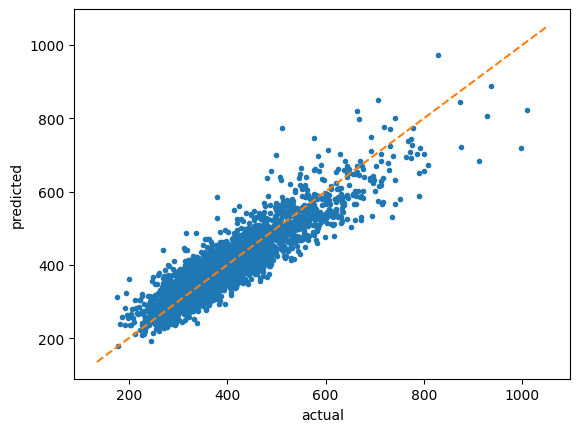

In [63]:
plt.plot(train_results.TOTAL_VALUE, train_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

Predict the validation data

In [64]:
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
    'TOTAL_VALUE': valid_y, 
    'predicted': valid_pred, 
    'residual': valid_y - valid_pred
})
print(valid_results.head())

      TOTAL_VALUE   predicted   residual
940         343.4  341.437322   1.962678
4107        400.3  409.256337  -8.956337
4582        520.9  456.037538  64.862462
3354        374.6  313.997430  60.602570
2502        483.8  432.710926  51.089074


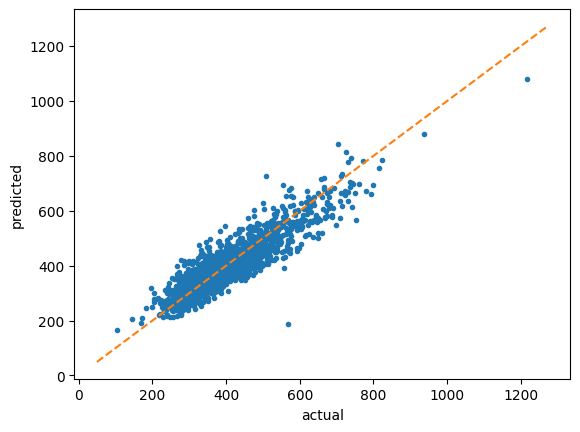

In [65]:
plt.plot(valid_results.TOTAL_VALUE, valid_results.predicted, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

## Table 2.13
We can use the metrics that scikit-learn provides.

In [66]:
print('Training set r2: ', r2_score(train_results.TOTAL_VALUE, train_results.predicted))
print('Validation set r2: ', r2_score(valid_results.TOTAL_VALUE, valid_results.predicted))

Training set r2:  0.8151389728239271
Validation set r2:  0.8049400971033155


In [67]:
# import the utility function regressionSummary
from dmba import regressionSummary

# training set
regressionSummary(train_results.TOTAL_VALUE, train_results.predicted)

# validation set
regressionSummary(valid_results.TOTAL_VALUE, valid_results.predicted)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 42.9071
            Mean Absolute Error (MAE) : 32.4127
          Mean Percentage Error (MPE) : -1.0897
Mean Absolute Percentage Error (MAPE) : 8.4289

Regression statistics

                      Mean Error (ME) : -0.5908
       Root Mean Squared Error (RMSE) : 43.3730
            Mean Absolute Error (MAE) : 32.5374
          Mean Percentage Error (MPE) : -1.2403
Mean Absolute Percentage Error (MAPE) : 8.5691


## Table 2.14

In [68]:
new_data = pd.DataFrame({
    'LOT_SQFT': [4200, 6444, 5035],
    'YR_BUILT': [1960, 1940, 1925],
    'GROSS_AREA': [2670, 2886, 3264],
    'LIVING_AREA': [1710, 1474, 1523],
    'FLOORS': [2.0, 1.5, 1.9],
    'ROOMS': [10, 6, 6],
    'BEDROOMS': [4, 3, 2],
    'FULL_BATH': [1, 1, 1],
    'HALF_BATH': [1, 1, 0],
    'KITCHEN': [1, 1, 1],
    'FIREPLACE': [1, 1, 0],
    'REMODEL_Old': [0, 0, 0],
    'REMODEL_Recent': [0, 0, 1],
})
print(new_data)

print('Predictions: ', model.predict(new_data))

   LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  ROOMS  BEDROOMS  \
0      4200      1960        2670         1710     2.0     10         4   
1      6444      1940        2886         1474     1.5      6         3   
2      5035      1925        3264         1523     1.9      6         2   

   FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE  REMODEL_Old  REMODEL_Recent  
0          1          1        1          1            0               0  
1          1          1        1          1            0               0  
2          1          0        1          0            0               1  
Predictions:  [389.844807   377.69247585 387.89498745]


## Figure 2.2 and 2.3

In [69]:
df = pd.DataFrame({'Expenditure': [239, 364,602, 644, 770, 789, 911], 
                   'Revenue': [514, 789, 550, 1386, 1394, 1440, 1354]})
df

,Expenditure,Revenue
0,239,514
1,364,789
2,602,550
3,644,1386
4,770,1394
5,789,1440
6,911,1354


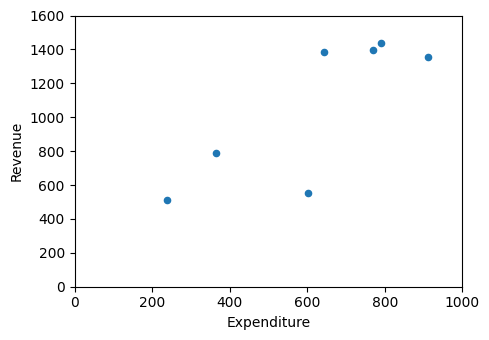

In [70]:
df.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
plt.tight_layout()  # Increase the separation between the plots
plt.show()

In [71]:
x = list(df.Expenditure)
y = list(df.Revenue)

from scipy import interpolate
f = interpolate.PchipInterpolator(x, y)

x_new = np.linspace(x[0], x[-1], 100)
y_new = [f(xi) for xi in x_new]

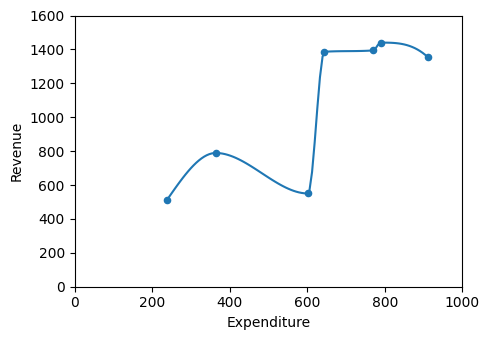

In [72]:
df.plot.scatter(x='Expenditure', y='Revenue', xlim=(0, 1000), ylim=(0, 1600), figsize=(5, 3.5))
plt.plot(x_new, y_new)
plt.tight_layout()  # Increase the separation between the plots
plt.show()

In [ ]:
# End of Document.